In [45]:
import numpy as np                  # imports the numeric python library
from matplotlib import pyplot as plt   # imports the required libraries for plotting
from scipy import signal
from scipy.io import wavfile
from os.path import dirname, join as pjoin
from IPython.display import Audio

#present_working_directory = %pwd
[fs, funky] = wavfile.read('funky.wav')
Audio(funky, rate=fs)

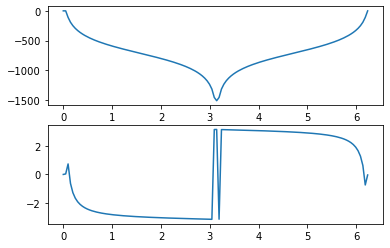

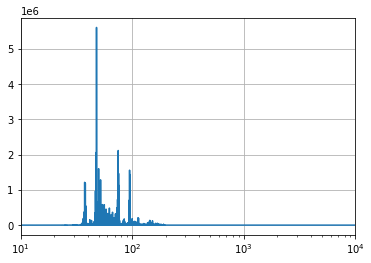

In [47]:
plt.figure()
fNorm = 200/(fs/2)
b,a = signal.butter(10,fNorm, 'lowpass')
funkylow = signal.filtfilt(b,a,funky)
w,h = signal.freqz(b,a,128, fs)
plt.subplot(2,1,1)
plt.plot(w, 20*np.log(np.absolute(h)))
plt.subplot(2,1,2)
plt.plot(w,np.angle(h))
plt.show

plt.figure()
f, pxx_den = signal.periodogram(funkylow, fs)
plt.semilogx(f, pxx_den)
plt.grid()
plt.xlim(10, 10**4)
plt.show

Audio(funkylow, rate=fs)
#removes all higher frequencies
#sounds very quiet and only has low notes
#not good at describing music, but only has the bass?

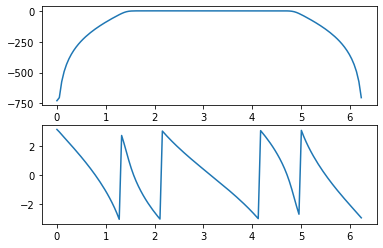

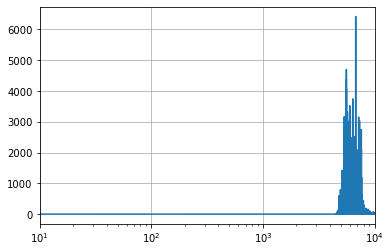

In [48]:
plt.figure()
fNorm =5000/(fs/2)
b,a = signal.butter(10,fNorm, 'highpass')
funkylow = signal.filtfilt(b,a,funky)
w,h = signal.freqz(b,a,128, fs)
plt.subplot(2,1,1)
plt.plot(w, 20*np.log(np.absolute(h)))
plt.subplot(2,1,2)
plt.plot(w,np.angle(h))
plt.show

plt.figure()
f, pxx_den = signal.periodogram(funkylow, fs)
plt.semilogx(f, pxx_den)
plt.grid()
plt.xlim(10, 10**4)
plt.show

Audio(funkylow, rate=fs)
# removes all lower frequencies
# high pitched sounds like shaking something metal
# is the best way i can describe it

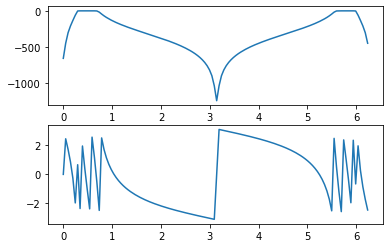

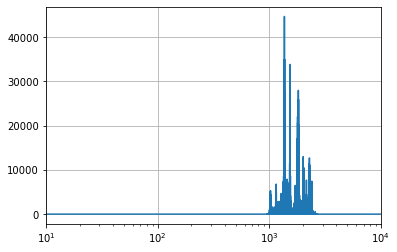

In [49]:
plt.figure()
low = 1000/(fs/2)
high = 2500/(fs/2)
b,a = signal.butter(10, [1000/(fs/2), 2500/(fs/2)], 'bandpass')
funkylow = signal.filtfilt(b,a,funky)
w,h = signal.freqz(b,a,128, fs)
plt.subplot(2,1,1)
plt.plot(w, 20*np.log(np.absolute(h)))
plt.subplot(2,1,2)
plt.plot(w,np.angle(h))
plt.show

plt.figure()
f, pxx_den = signal.periodogram(funkylow, fs)
plt.semilogx(f, pxx_den)
plt.grid()
plt.xlim(10, 10**4)
plt.show

Audio(funkylow, rate=fs)
# only has middle frequencies
# sounds muted mostly